# ONS Labour Market Statistics
The UK's [Office of National Statistics (ONS)](https://www.ons.gov.uk/) publishes data on the country's labour market, updated each month.
This notebook fetches the latest version of the statistics, moves some of the vacancy data into a pandas dataframe, and graphs some of the most recent data.

In [1]:
# Get the start page for the stats and find the link to the latest version, and download it
from bs4 import BeautifulSoup
import re
import requests

ons_file = requests.get('https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/employmentandemployeetypes/datasets/summaryoflabourmarketstatistics')

soup = BeautifulSoup(ons_file.content)
candidate_count = 0

# find the link to the latest version
for link in soup.findAll('a', {'href': re.compile('20[0-9][0-9]')}):
    if 'xls' in link.get('href'):
        target_file_addr = 'https://www.ons.gov.uk' + link.get('href')
        candidate_count += 1

if candidate_count == 0:
    print("Couldn't find xls link in web page.")
elif candidate_count > 1:
    print('Found too many possible data files (containing "xls") on web page.')
else:
    print('Downloading this file:')
    print(target_file_addr)
    # download it
    xls_file = requests.get(target_file_addr).content

https://www.ons.gov.uk/file?uri=%2femploymentandlabourmarket%2fpeopleinwork%2femploymentandemployeetypes%2fdatasets%2fsummaryoflabourmarketstatistics%2fcurrent/a01jul2020.xlsx


In [2]:
import pandas as pd
import numpy as np

vacancies = pd.read_excel(xls_file, '19')

# make sheet row 8 the header
vacancies.columns = vacancies.iloc[6]
# remove the index header
vacancies.columns.name = ''

# rename first two columns
vacancies.rename(columns={vacancies.columns[0]: 'Three months ending'},
                 inplace=True)

# drop the first 8 rows
vacancies.drop(vacancies.index[:9], inplace=True)

# remove 4 tail rows
vacancies.drop(vacancies.tail(4).index, inplace=True)

# Modify text in first column
vacancies['Three months ending'] = vacancies['Three months ending'].str.split("-").str[1]
vacancies['Three months ending'] = vacancies['Three months ending'].str.split("(").str[0]
vacancies['Three months ending'] = vacancies['Three months ending'].str.rstrip()

# remove last two columns
vacancies = vacancies.iloc[:, :-2]

# index
vacancies.index = np.arange(1, len(vacancies) + 1)

# if you want to see it:
print(vacancies)

    Three months ending AP2Y  AP3K  AP3L ALY5 ALY6 ALY7 ALY8 ALY9
1              Jun 2001  680   NaN   NaN  139  101   86  145  209
2              Jul 2001  673   NaN   NaN  138  101   84  144  207
3              Aug 2001  661   NaN   NaN  135   99   83  142  202
4              Sep 2001  661   -19  -2.7  142  103   79  140  196
5              Oct 2001  637   -36  -5.3  135   99   74  138  190
..                  ...  ...   ...   ...  ...  ...  ...  ...  ...
225            Feb 2020  818    21   2.6  118  121  113  171  295
226            Mar 2020  796    -5  -0.6  112  110  109  167  298
227            Apr 2020  642  -165 -20.5   83   79   89  135  256
228            May 2020  476  -342 -41.8   63   53   64  100  197
229            Jun 2020  333  -463 -58.1   47   34   42   67  144

[229 rows x 9 columns]


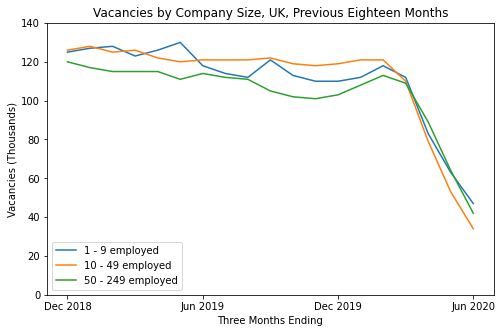

In [3]:
import matplotlib.pyplot as plt

eighteen_mths = vacancies[-19:]
tiny_companies = eighteen_mths['ALY5']
small_companies = eighteen_mths['ALY6']
mid_companies = eighteen_mths['ALY7']
large_companies = eighteen_mths['ALY8']
huge_companies = eighteen_mths['ALY9']

plt.figure(figsize=(8,5))
plt.ylim(0, tiny_companies.max()+10)
plt.ylabel('Vacancies (Thousands)')
plt.xlabel('Three Months Ending')
plt.title('Vacancies by Company Size, UK, Previous Eighteen Months')
plt.plot(tiny_companies, label='1 - 9 employed')
plt.plot(small_companies, label='10 - 49 employed')
plt.plot(mid_companies, label='50 - 249 employed')

plt.xticks([211, 217, 223, 229],
           ['Dec 2018', 'Jun 2019', 'Dec 2019', 'Jun 2020'])
plt.legend()

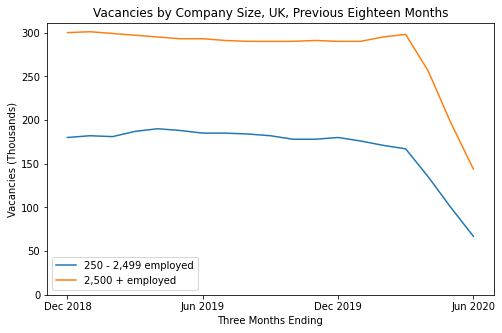

In [4]:
plt.figure(figsize=(8,5))
plt.ylim(0, huge_companies.max()+10)
plt.ylabel('Vacancies (Thousands)')
plt.xlabel('Three Months Ending')
plt.title('Vacancies by Company Size, UK, Previous Eighteen Months')
plt.plot(large_companies, label='250 - 2,499 employed')
plt.plot(huge_companies, label='2,500 + employed')

plt.xticks([211, 217, 223, 229],
           ['Dec 2018', 'Jun 2019', 'Dec 2019', 'Jun 2020'])
plt.legend()

In [5]:
# here I confess some confusion: without the explicit cast to float64,
# the correlation throws an error
all_companies = vacancies['AP2Y'].astype('float64')
tiny_companies = vacancies['ALY5'].astype('float64')
small_companies = vacancies['ALY6'].astype('float64')
mid_companies = vacancies['ALY7'].astype('float64')
large_companies = vacancies['ALY8'].astype('float64')
huge_companies = vacancies['ALY9'].astype('float64')

tiny_corr = all_companies.corr(tiny_companies)
small_corr = all_companies.corr(small_companies)
mid_corr = all_companies.corr(mid_companies)
large_corr = all_companies.corr(large_companies)
huge_corr = all_companies.corr(huge_companies)

print(tiny_corr)
print(small_corr)
print(mid_corr)
print(large_corr)
print(huge_corr)


0.8595470998658588
0.9576155927040287
0.9648513403864476
0.9253073951560608
0.9239364863603644
